### Examples of different kinds of tapers

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows
from obspy import read
%matplotlib notebook

In [24]:
### define a function that calculates and outputs the SHIFTED amplitude spectrum

def amp_spec(y,dt,NFFT=2048):
    '''
    y is the input time series
    dt is the sampling interval
    
    return as outoput the shifted freq vector, and the shifted ampl. spectrum
    '''
    
    y_fft = np.fft.fft(y,NFFT)
    ampl = np.abs(y_fft)  #this is the ampl. spectrum proper
    f = np.fft.fftfreq(NFFT, dt) #this is the un-shifted frequency vector
    
    #now shift because you have OCD
    f = np.fft.fftshift(f)
    ampl = np.fft.fftshift(ampl)*2 #double if you are on;ly gping to plot the positive
    
    return f,ampl
    

In [25]:
Nsamples = 1000
dt = 0.01
t = np.arange(0,Nsamples*dt,dt)
window = windows.boxcar(Nsamples) #boxcar
window2 = windows.blackman(Nsamples) #Blackman
window3 = windows.parzen(Nsamples) #Blackman

<IPython.core.display.Javascript object>


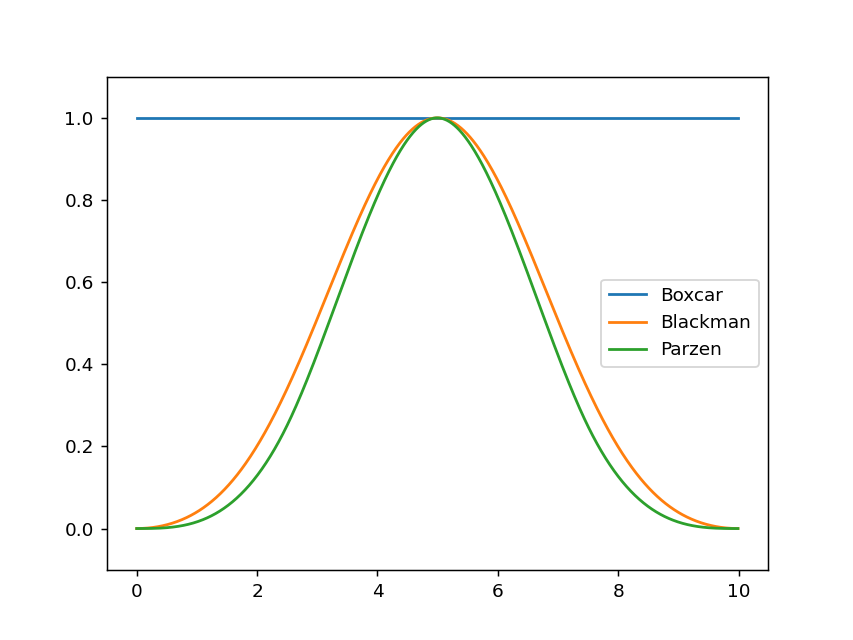

(-0.1, 1.1)

In [26]:
plt.figure()
plt.plot(t,window,label='Boxcar')
plt.plot(t,window2,label='Blackman')
plt.plot(t,window3,label='Parzen')
plt.legend()
plt.ylim([-0.1,1.1])

In [27]:
f,A = amp_spec(window,dt,4096)
f,A2 = amp_spec(window2,dt,4096)
f,A3 = amp_spec(window3,dt,4096)

<IPython.core.display.Javascript object>


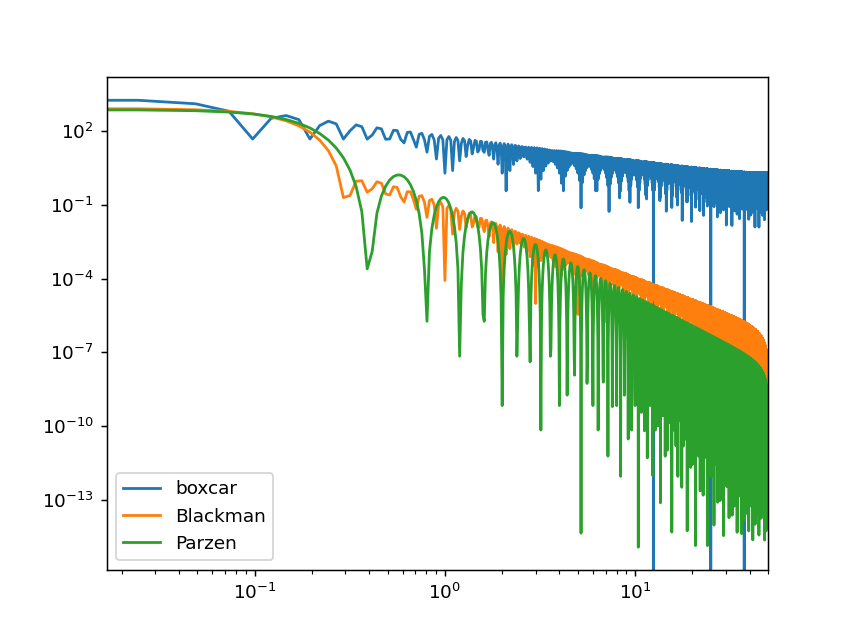

<ipython-input-28-664b0c777cd4>:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,1/(2*dt))


(0.016675703319077164, 50.0)

In [28]:
plt.figure()
plt.loglog(f,A,label='boxcar')
plt.loglog(f,A2,label='Blackman')
plt.loglog(f,A3,label='Parzen')
plt.legend()
plt.xlim(0,1/(2*dt))

In [62]:
d=np.genfromtxt('/Users/dmelgarm/Classes/Signal_Processing/Winter2021/Data/IWT009_vel.txt')
st=read('/Users/dmelgarm/Nepal2015/strong_motion/KATNP.acc.e')
w=scipy.signal.windows.hamming(st[0].stats.npts)
f,amp=amp_spec(st[0].data,0.01)
f,amp2=amp_spec(st[0].data*w,0.01)

<IPython.core.display.Javascript object>


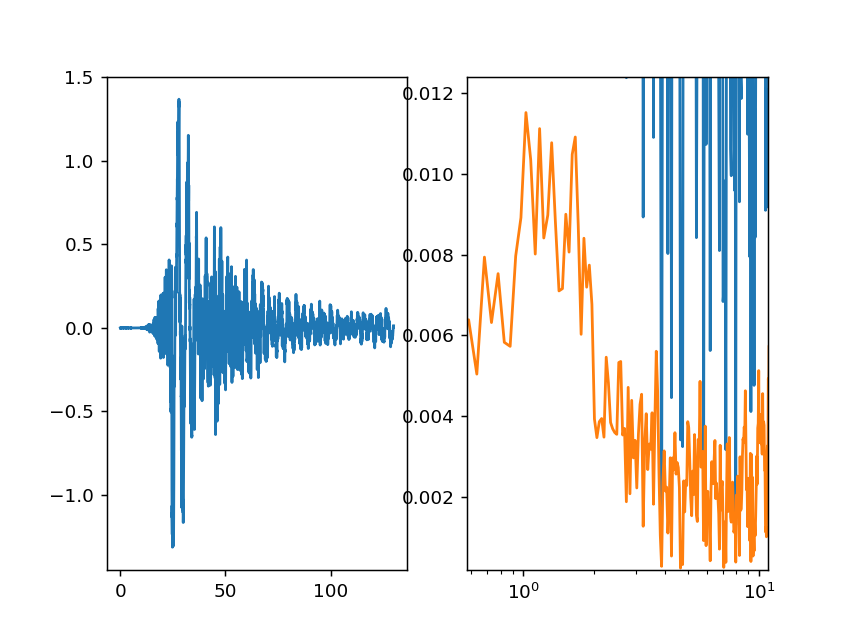

In [63]:
plt.figure()
plt.subplot(121)
plt.plot(st[0].times(),st[0].data)
plt.subplot(122)
plt.semilogx(f,amp)
plt.semilogx(f,amp2)

In [31]:
print(st)

1 Trace(s) in Stream:
NQ.KATNP..HNE | 2015-04-25T06:11:29.450000Z - 2015-04-25T06:13:39.450000Z | 200.0 Hz, 26001 samples


In [32]:
np.savetxt('/Users/dmelgarm/Classes/363 Comp Tools/fall_2020/data/KATNP.accel.e.txt',np.c_[st[0].times(),st[0].data],fmt='%.6f',header='time (s), accel (m/s/s)')

In [44]:
import scipy
v=scipy.integrate.cumtrapz(st[0].data,st[0].times(),initial=0) 
print(v)
vd=scipy.signal.detrend(v)

[  0.00000000e+00   6.51594819e-07   1.20836208e-06 ...,   3.07429226e-01
   3.07478783e-01   3.07538331e-01]


<IPython.core.display.Javascript object>


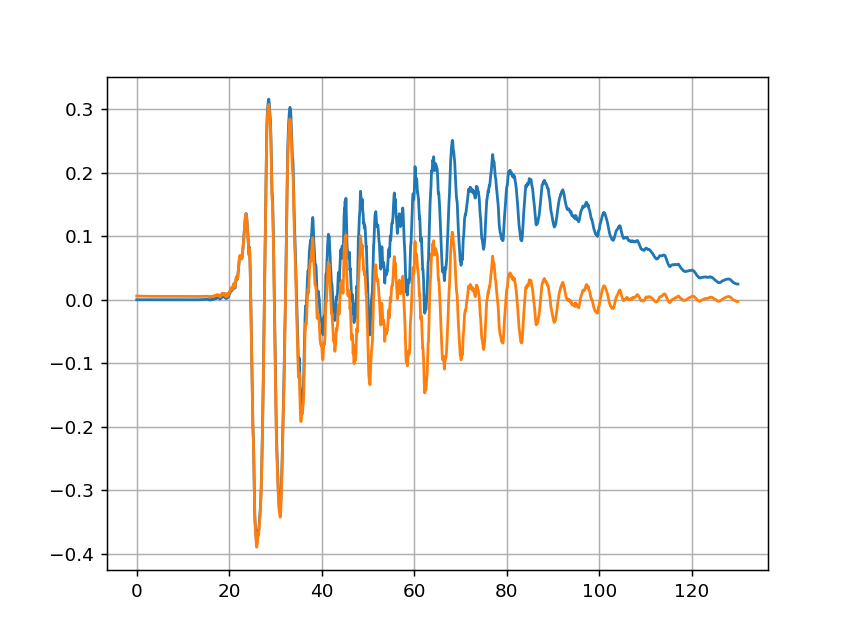

In [58]:
w=scipy.signal.windows.hamming(len(v))
plt.figure()
plt.plot(st[0].times(),w*v)
plt.plot(st[0].times(),w*vd)
plt.grid()


<IPython.core.display.Javascript object>


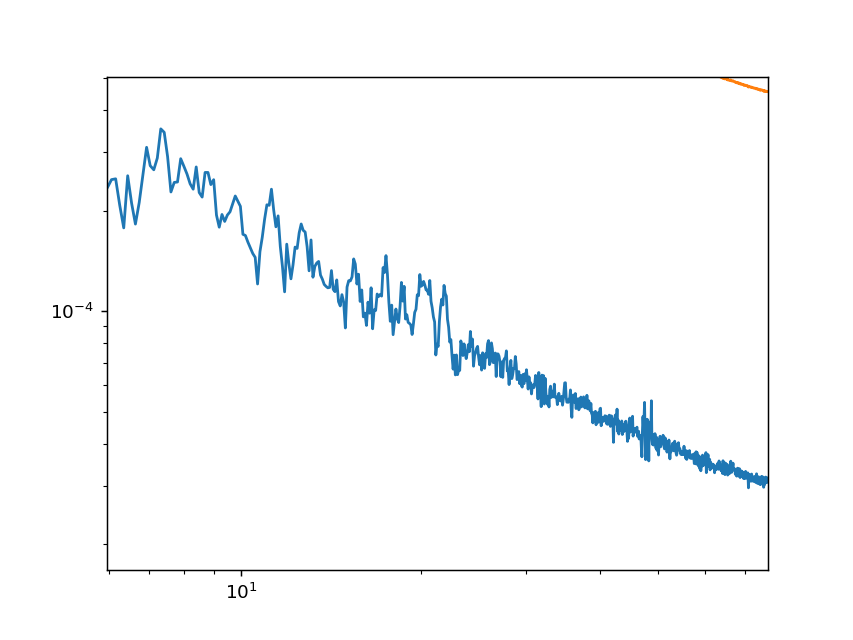

In [59]:
w=scipy.signal.windows.hamming(len(v))
f,amp1=amp_spec(w*v,0.005)
f,amp2=amp_spec(w*vd,0.005)

plt.figure()
plt.loglog(f,amp1)
plt.loglog(f,amp2)